In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('results/experiment1_20211209163545.csv')
df.latency = df.latency * 10e-6
df.head()

,system_name,run_id,latency,operation,on_leader,n_nodes,n_clients,order_on_write
0,ordering_after_write_2_nodes_1_client,0,1.443,read,True,2,1,False
1,ordering_after_write_2_nodes_1_client,0,1.245,read,False,2,1,False
2,ordering_after_write_2_nodes_1_client,0,2.666,write,True,2,1,False
3,ordering_after_write_2_nodes_1_client,0,2.577,write,True,2,1,False
4,ordering_after_write_2_nodes_1_client,0,0.973,read,False,2,1,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 6
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system_name     4 non-null      object 
 1   operation       4 non-null      object 
 2   n_nodes         4 non-null      int64  
 3   run_id          4 non-null      float64
 4   latency         4 non-null      float64
 5   on_leader       4 non-null      float64
 6   n_clients       4 non-null      float64
 7   order_on_write  4 non-null      float64
 8   latency_factor  4 non-null      float64
 9   speedup         4 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 352.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 7
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system_name     4 non-null      object 
 1   operation       4 non-null      object 
 2   n_nodes         4 non-null      int64  
 3   run_id          4 non-null      float64
 4   latency         4 non-null      float64
 5   on_leader       4 non-null      float64
 6   n_clients       4 non-null      float64
 7   order_on_write  4 non-null      float64
 8   latency_factor  4 non-null      float64
 9   speedup         4 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 352.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 8 to 14
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system_name     4 non-null      object 
 1   operation       4 non-null      object 
 2   n_nodes         4 non-null      int64  
 3   run_id          4 non-null      float64
 4   latency         4 non-null      float64
 5   on_leader       4 non-null      float64
 6   n_clients       4 non-null      float64
 7   order_on_write  4 non-null      float64
 8   latency_factor  4 non-null      float64
 9   speedup         4 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 352.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 9 to 15
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system_name     4 non-null      object 
 1   operation       4 non-null      object 
 2   n_nodes         4 non-null      int64  
 3   run_id          4 non-null      float64
 4   latency         4 non-null      float64
 5   on_leader       4 non-null      float64
 6   n_clients       4 non-null      float64
 7   order_on_write  4 non-null      float64
 8   latency_factor  4 non-null      float64
 9   speedup         4 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 352.0+ bytes


None

<AxesSubplot:xlabel='system_name', ylabel='latency'>

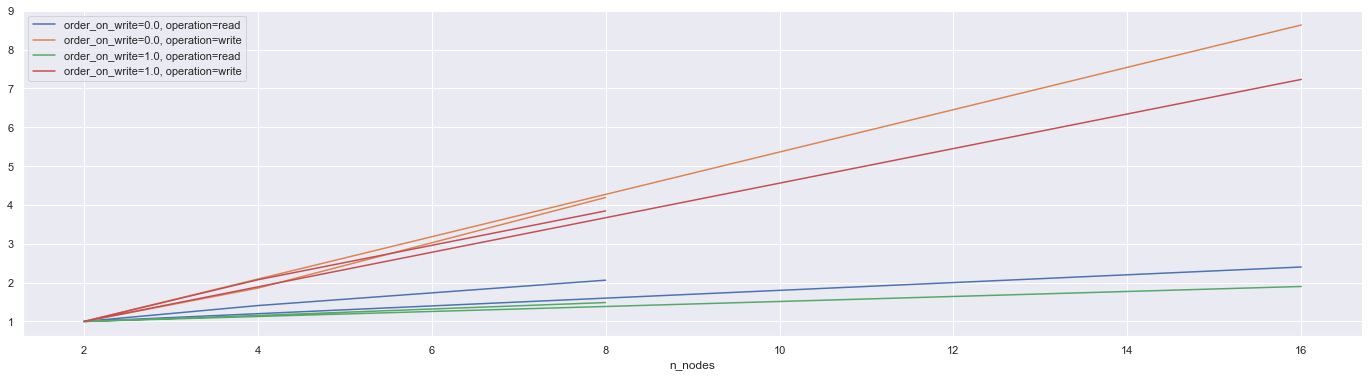

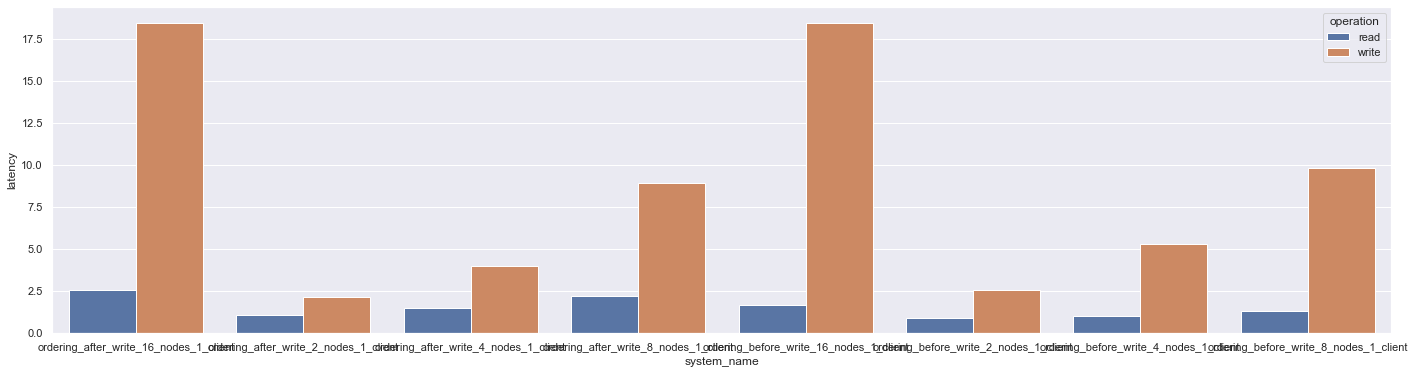

In [10]:
agg_df = df.groupby(['system_name', 'operation', 'n_nodes']).mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["n_nodes"]


def speedup(sub_df):
    two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
    sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
    return sub_df

agg_df = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)


ax = None
for group, group_df in agg_df.groupby(['order_on_write', 'operation']):
    label = f"order_on_write={group[0]}, operation={group[1]}"
    ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

plt.figure(figsize=(24,6))
sns.barplot(x='system_name', y='latency', hue="operation", data=agg_df)

# # for group, sub_df in xxx.groupby("system_name"):
# #     sub_df.plot(x='n_nodes', y='latency_factor', kind='scatter', figsize=(24, 8))

# for group, sub_df in df.groupby("system_name"):
#     sub_df.boxplot(by="operation", column="latency", ax=None, grid=True, figsize=(24, 5))
# axs[0].set(ylabel='latency (ms)')
# fig.suptitle('Mean Latency Per Operation')

In [4]:
# fig = ax.get_figure()
fig.savefig('results/figures/order_before_vs_after_write.pdf')

NameError: name 'fig' is not defined